[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv10 Object Detection on a Custom Dataset

---

[![arXiv](https://img.shields.io/badge/arXiv-2405.14458-b31b1b.svg)](https://arxiv.org/pdf/2405.14458.pdf)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/THU-MIG/yolov10)


## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv10
- Download pre-trained weights
- Download example data
- Inference with Pre-trained COCO Model
- Download dataset from Roboflow Universe
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue May 28 10:25:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv10

In [3]:
!pip install -q supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 1.1 MB/s eta 0:00:00


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.2 MB/s eta 0:00:00


## Download pre-trained weights

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P {HOME}/weights -q https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt
!ls -lh {HOME}/weights

total 408M
-rw-r--r-- 1 root root  80M May 23 09:38 yolov10b.pt
-rw-r--r-- 1 root root 100M May 23 09:38 yolov10l.pt
-rw-r--r-- 1 root root  64M May 23 09:38 yolov10m.pt
-rw-r--r-- 1 root root  11M May 23 09:38 yolov10n.pt
-rw-r--r-- 1 root root  32M May 23 09:38 yolov10s.pt
-rw-r--r-- 1 root root 123M May 23 09:38 yolov10x.pt


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="YVG0asIRIReZMKttSddm")
project = rf.workspace("dogan-1mhov").project("oniondetection-rtzqv")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 909.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to OnionDetection-2 in yolov8:: 100%|██████████| 1514/1514 [00:00<00:00, 3891.64it/s]


## Custom Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train epochs=100 batch=5 plots=True \
model={HOME}/weights/yolov10m.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10m.pt, data=/content/datasets/OnionDetection-2/data.yaml, epochs=100, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, class

In [9]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1716892201.8c5e7908782a.2236.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch11880.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch11881.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch11882.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


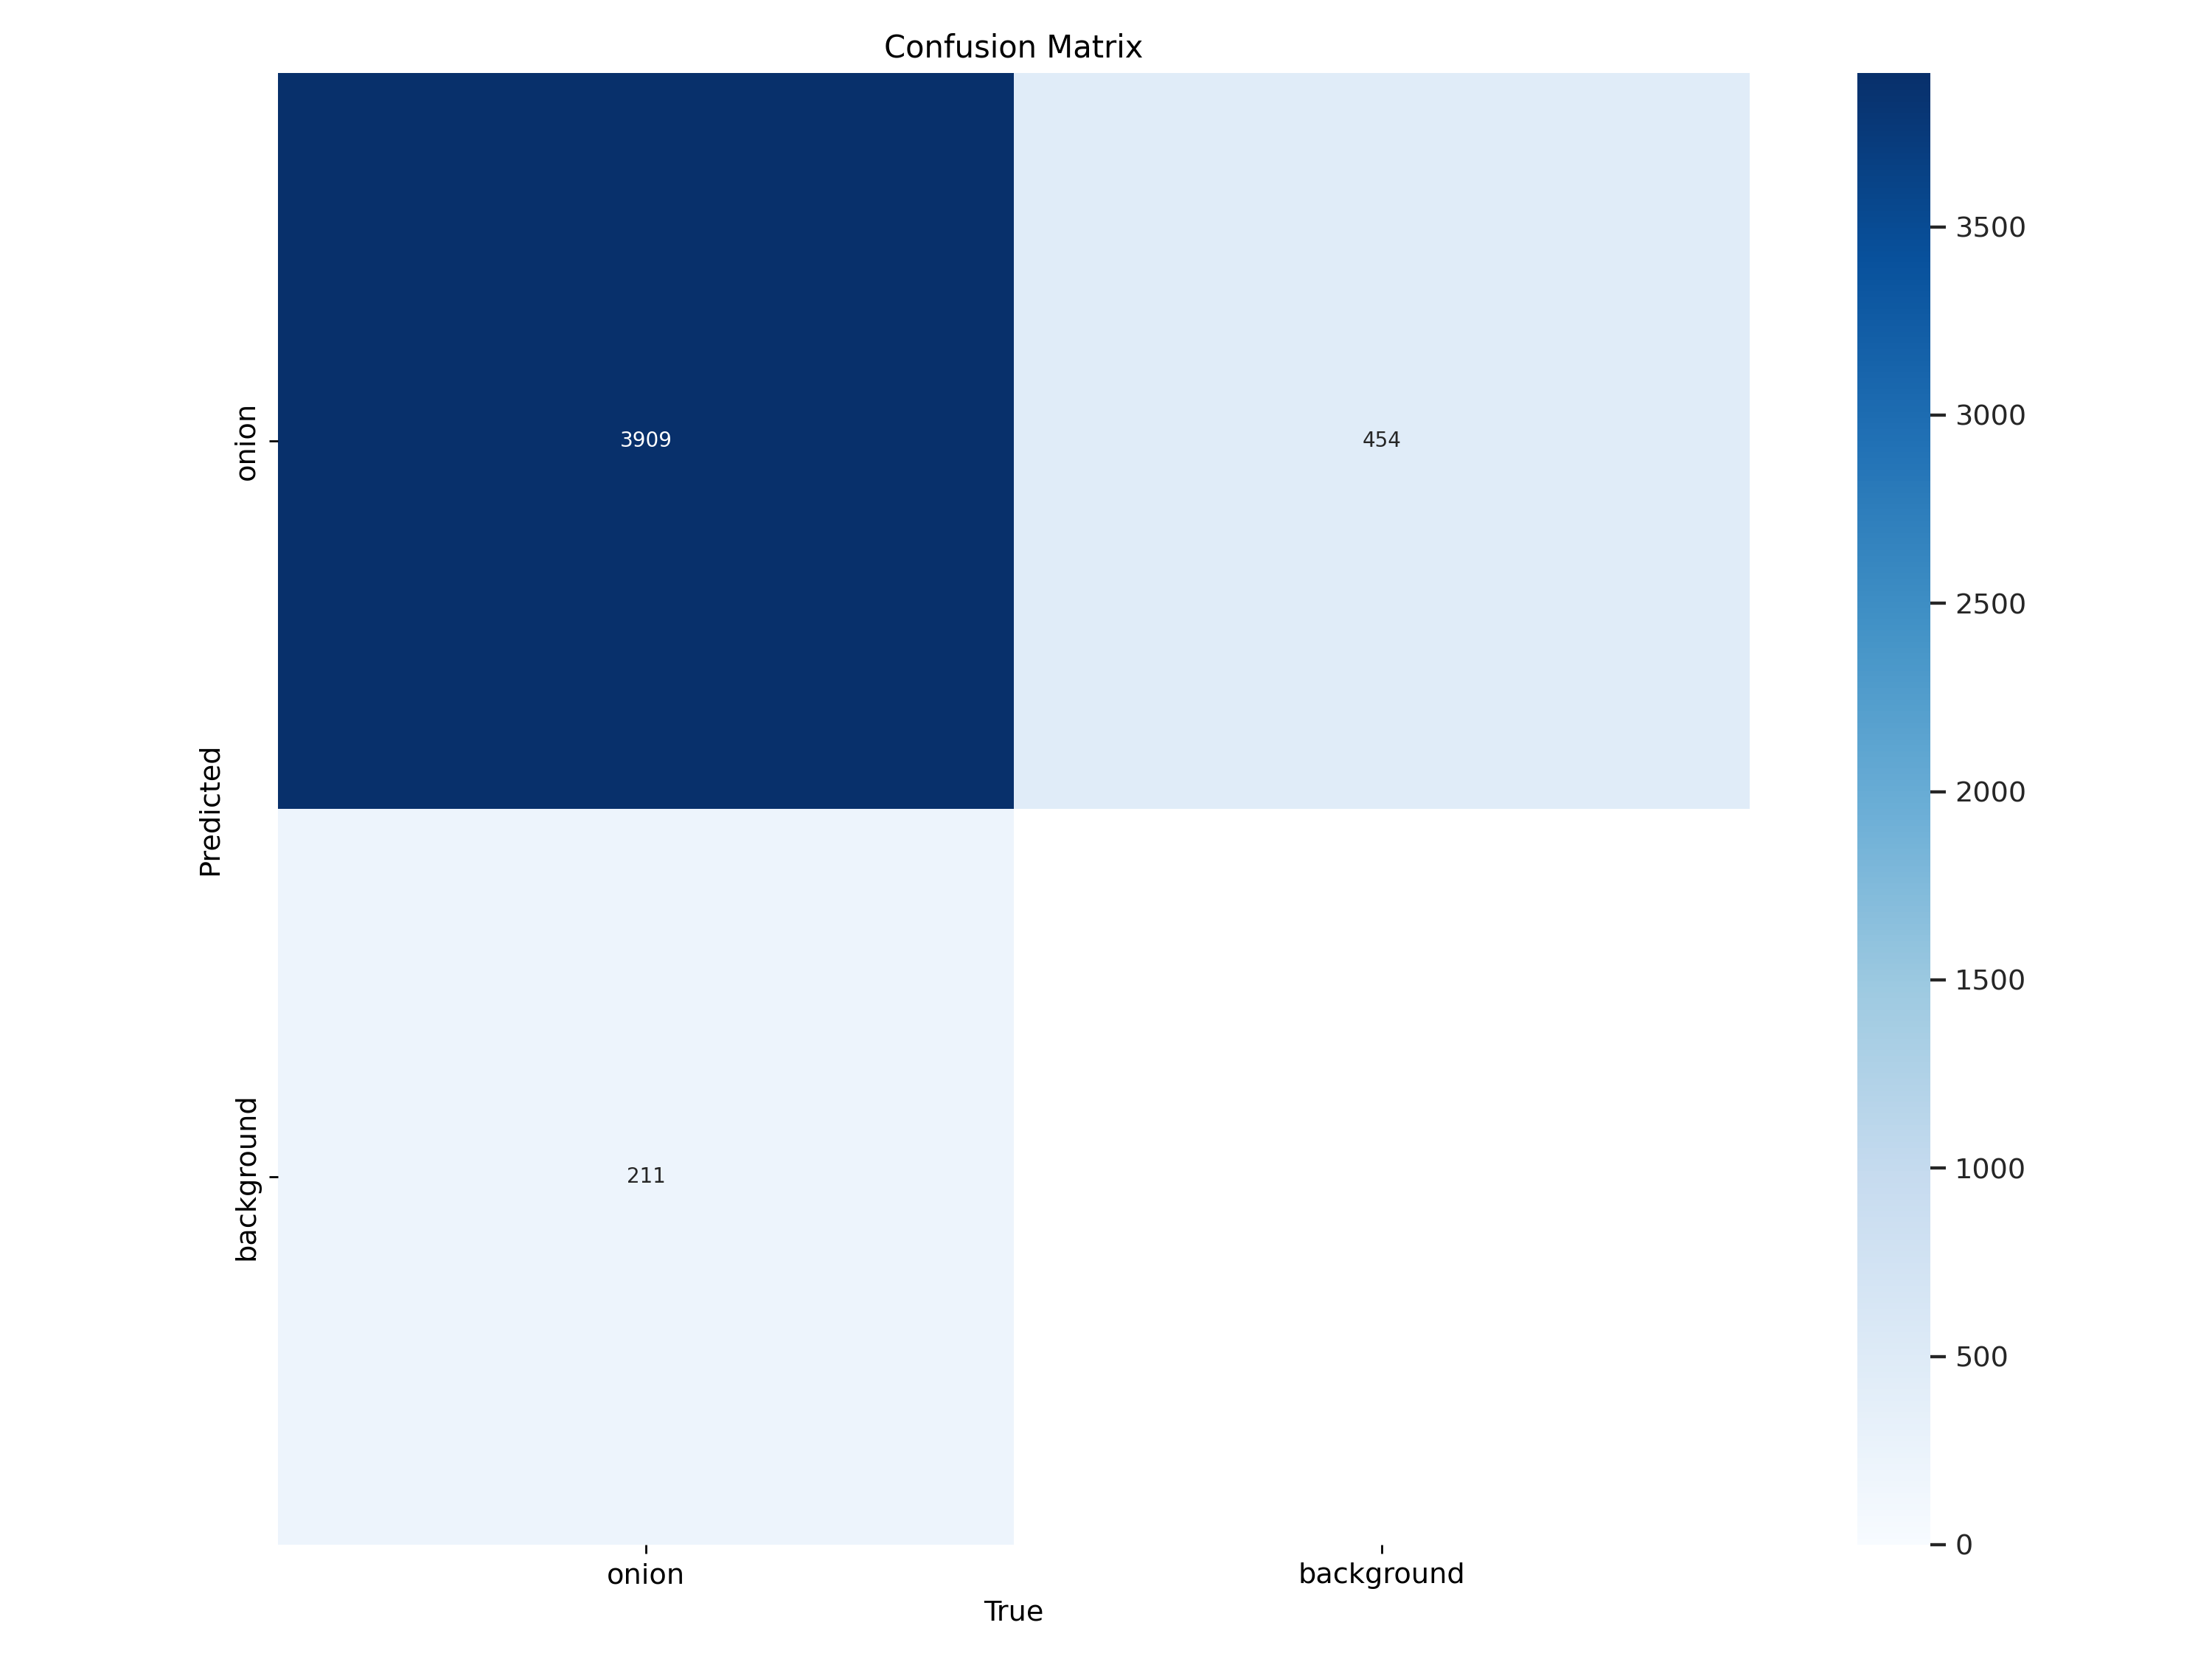

In [20]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


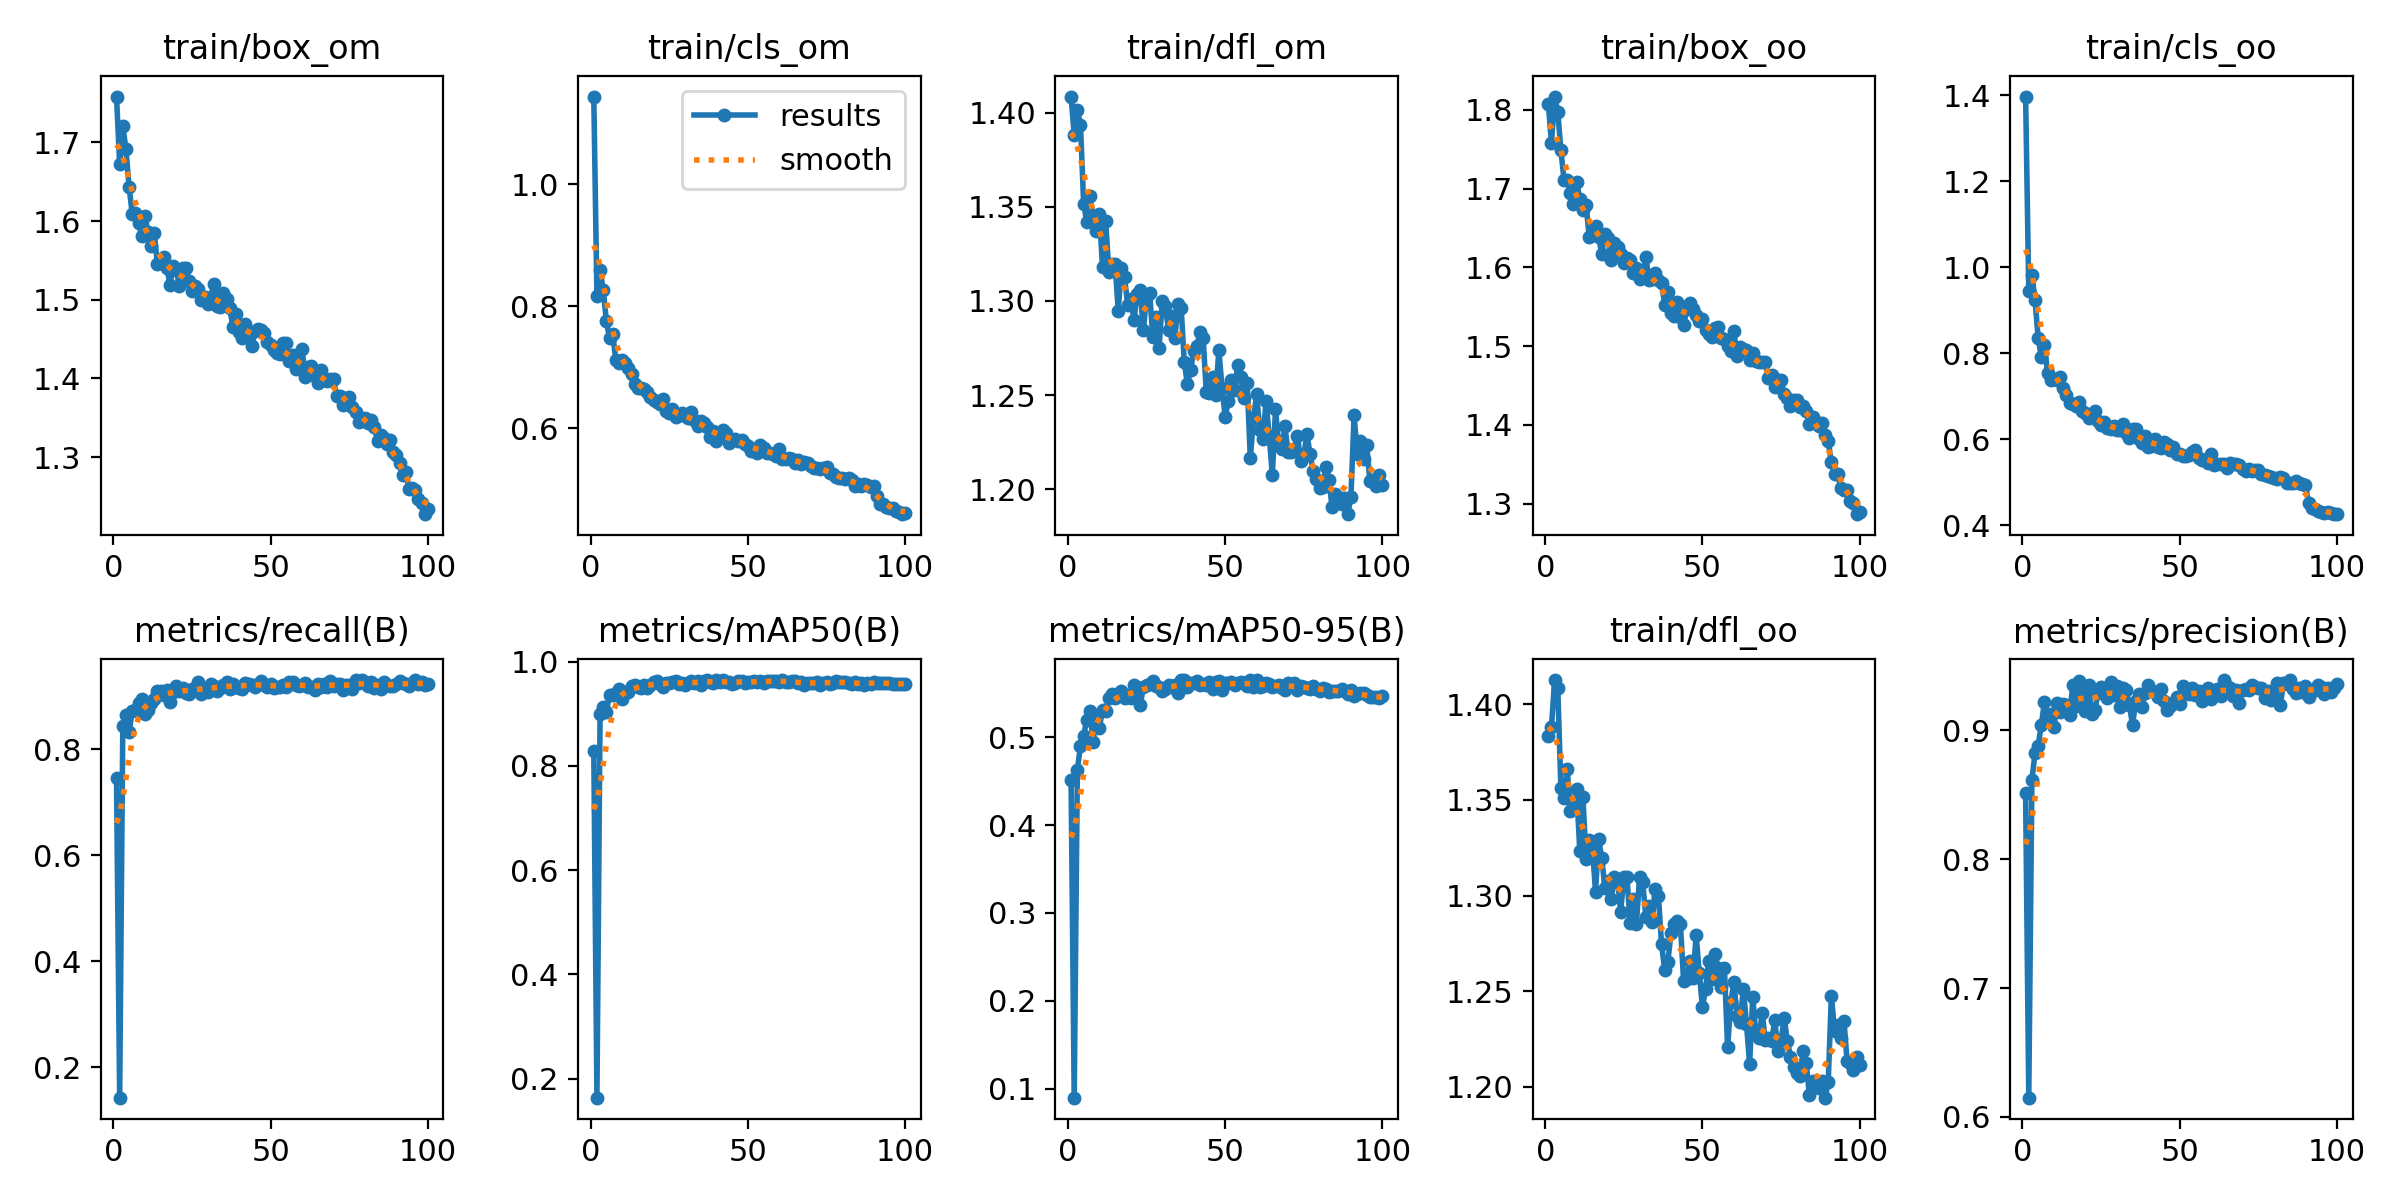

In [21]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [29]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={dataset.location}/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 /content/datasets/OnionDetection-2/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg: 640x640 (no detections), 36.1ms
Speed: 2.8ms preprocess, 36.1ms inference, 242.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict12
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [31]:
from ultralytics import YOLOv10

model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')
results = model(source=f'{dataset.location}/test/images', conf=0.5)


image 1/31 /content/datasets/OnionDetection-2/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg: 640x640 60 onions, 34.1ms
image 2/31 /content/datasets/OnionDetection-2/test/images/29_jpg.rf.b683402453163de86906d05e16ca6aeb.jpg: 640x640 205 onions, 33.7ms
image 3/31 /content/datasets/OnionDetection-2/test/images/30_jpg.rf.4dbb29f91e60852f4f7f2beb985325da.jpg: 640x640 61 onions, 33.5ms
image 4/31 /content/datasets/OnionDetection-2/test/images/33_jpg.rf.f04bcf4ca36c2a1fc26b0f2e47151628.jpg: 640x640 40 onions, 33.4ms
image 5/31 /content/datasets/OnionDetection-2/test/images/34_jpg.rf.3517215730da6d733e6163b358a3d612.jpg: 640x640 69 onions, 33.4ms
image 6/31 /content/datasets/OnionDetection-2/test/images/35_jpg.rf.dcf0f098e2c8bc8c1e1a84902c99ee73.jpg: 640x640 58 onions, 33.4ms
image 7/31 /content/datasets/OnionDetection-2/test/images/39_jpg.rf.8cc962918cf2367469dc04c1a117fb99.jpg: 640x640 45 onions, 33.4ms
image 8/31 /content/datasets/OnionDetection-2/test/images/40_jpg.rf.2c9ef3

In [37]:
%cd {HOME}
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/weights/yolov10n.pt \
source={dataset.location}/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg

/content
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2762608 parameters, 63840 gradients, 8.6 GFLOPs

image 1/1 /content/datasets/OnionDetection-2/test/images/23_jpg.rf.07d41180b4d5a1caac930a220ed56e29.jpg: 640x640 (no detections), 15.2ms
Speed: 2.8ms preprocess, 15.2ms inference, 131.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict13
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [48]:
from ultralytics import YOLOv10
import cv2

# YOLOv10 modelini yükle
model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')

# Giriş resmi ve boyutları
input_image_path = f'{HOME}/test/202.JPG'
input_image = cv2.imread(input_image_path)
input_image_height, input_image_width, _ = input_image.shape

# Çerçeve boyutları
frame_size = 128
overlap = 0  # Örtüşme miktarı olmadığı için 0

# Klasör adı ve oluşturulması
output_folder = "result3"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Her bir çerçeve için tespit sonuçlarını al, çerçeveyi etiketlenmiş olarak kaydet ve nesne sayısını yazdır
frame_number = 1
total_onion_count = 0  # Toplam soğan sayısını saklamak için değişken
for i in range(0, input_image_height, frame_size):
    for j in range(0, input_image_width, frame_size):
        # Çerçeve başlangıç ve bitiş koordinatları
        start_x = j
        start_y = i
        end_x = min(start_x + frame_size, input_image_width)
        end_y = min(start_y + frame_size, input_image_height)

        # Çerçeve resmini al
        frame = input_image[start_y:end_y, start_x:end_x]

        # Tahminlerde bulun
        results = model(frame, conf=0.2)

        # Sonuçların çıktısını işleyin
        boxes = results[0].boxes if isinstance(results, list) else results.boxes
        num_objects = len(boxes)

        # Toplam soğan sayısını güncelle
        total_onion_count += num_objects

        # Tespit edilen nesnelerin çerçevelerini çiz
        for box in boxes:
            box = box.cpu().numpy()  # Tensor'u numpy array'e dönüştür
            x1, y1, x2, y2 = map(int, box[:4])  # Koordinatları al
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{int(box[5])} {box[4]:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Nesne sayısını çerçevenin sol üst köşesine yazdır
        text = f"Nesne Sayısı: {num_objects}"
        font_scale = min(frame_size, frame_size) / 300  # Yazı boyutunu ayarla
        thickness = max(int(font_scale), 1)  # Yazı kalınlığını ayarla
        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]  # Yazı boyutunu al
        text_x = int((frame_size - text_size[0]) / 2)  # Yazının x konumunu ayarla
        text_y = int((frame_size + text_size[1]) / 2)  # Yazının y konumunu ayarla
        cv2.putText(frame, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

        # Çerçevenin etiketlenmiş halini kaydet
        output_image_path = os.path.join(output_folder, f"frame_{frame_number}.jpg")
        cv2.imwrite(output_image_path, frame)  # Etiketlenmiş çerçeveyi kaydet

        # Çerçevenin numarasını ve nesne sayısını yazdır
        print(f"Çerçeve {frame_number} - Nesne Sayısı: {num_objects}")

        # Sonraki çerçeve için numarayı artır
        frame_number += 1

# Toplam soğan sayısını yazdır
print("Toplam soğan sayısı:", total_onion_count)


0: 640x640 (no detections), 34.1ms
Speed: 2.4ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Çerçeve 1 - Nesne Sayısı: 0

0: 640x640 (no detections), 34.2ms
Speed: 2.5ms preprocess, 34.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Çerçeve 2 - Nesne Sayısı: 0

0: 640x640 1 onion, 26.7ms
Speed: 2.9ms preprocess, 26.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Boxes'

In [49]:
from ultralytics import YOLOv10
import cv2
import os

# YOLOv10 modelini yükle
model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')

# Giriş resmi ve boyutları
input_image_path = f'{HOME}/test/202.JPG'
input_image = cv2.imread(input_image_path)
input_image_height, input_image_width, _ = input_image.shape

# Çerçeve boyutları
frame_size = 128
overlap = 0  # Örtüşme miktarı olmadığı için 0

# Çerçeveleri kaydetmek için klasör oluştur
output_folder = f'{HOME}/test_sonuclari'
os.makedirs(output_folder, exist_ok=True)

# Her bir çerçeve için tespit sonuçlarını al ve kaydet
for i in range(0, input_image_height, frame_size):
    for j in range(0, input_image_width, frame_size):
        # Çerçeve başlangıç ve bitiş koordinatları
        start_x = j
        start_y = i
        end_x = min(start_x + frame_size, input_image_width)
        end_y = min(start_y + frame_size, input_image_height)

        # Çerçeve resmini al
        frame = input_image[start_y:end_y, start_x:end_x]

        # Tahminlerde bulun
        results = model(frame, conf=0.2)

        # results değişkeninin tipini kontrol et
        if isinstance(results, list):
            # Listenin ilk elemanını al
            results = results[0]

        # Nesne sayısını al ve çerçevenin adını oluştur
        object_count = len(results.boxes)
        frame_label = f'cerceve{object_count}.jpg'

        # Çerçeveyi ve tespit edilen nesneleri kaydet
        output_path = os.path.join(output_folder, frame_label)
        results.save(output_path)

print("Çerçeveler başarıyla kaydedildi.")



0: 640x640 (no detections), 34.1ms
Speed: 2.4ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 onion, 34.1ms
Speed: 4.3ms preprocess, 34.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 onions, 32.3ms
Speed: 2.8ms preprocess, 32.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 10 onions, 21.1ms
Speed: 2.4ms preprocess, 21.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 28 onions, 21.1ms
Speed: 3.5ms preprocess, 21.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 19 onions, 21.0ms
Speed: 3.1ms preprocess, 21.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 27 onions, 20.9ms
Speed: 2.5ms preprocess, 20.9ms inference, 1.2ms postprocess per image a

In [50]:
from ultralytics import YOLOv10
import cv2

# YOLOv10 modelini yükle
model = YOLOv10(f'{HOME}/runs/detect/train2/weights/best.pt')

# Giriş resmi ve boyutları
input_image_path = f'{HOME}/test/202.JPG'
input_image = cv2.imread(input_image_path)
input_image_height, input_image_width, _ = input_image.shape

# Çerçeve boyutları
frame_size = 128
overlap = 0  # Örtüşme miktarı olmadığı için 0

# Giriş resmini oku
input_image = cv2.imread(input_image_path)

# Toplam soğan sayısını saklamak için değişkeni tanımla
total_onion_count = 0

# Her bir çerçeve için tespit sonuçlarını al ve soğan sayılarını topla
for i in range(0, input_image_height, frame_size):
    for j in range(0, input_image_width, frame_size):
        # Çerçeve başlangıç ve bitiş koordinatları
        start_x = j
        start_y = i
        end_x = min(start_x + frame_size, input_image_width)
        end_y = min(start_y + frame_size, input_image_height)

        # Çerçeve resmini al
        frame = input_image[start_y:end_y, start_x:end_x]

        # Tahminlerde bulun
        results = model(frame, conf=0.2)

        # results değişkeninin tipini kontrol et
        if isinstance(results, list):
            # Listenin ilk elemanını al
            results = results[0]

        # Çerçeve numarasını hesapla
        cerceve_numarasi = (i // frame_size) * (input_image_width // frame_size) + (j // frame_size) + 1

        # Çerçeve numarasını ve tespit edilen soğan sayısını yazdır
        print(f"Çerçeve {cerceve_numarasi}: {len(results.boxes)} soğan")

        # Soğan sayısını topla
        total_onion_count += len(results.boxes)

# Toplam soğan sayısını yazdır
print("Toplam soğan sayısı:", total_onion_count)



0: 640x640 (no detections), 34.1ms
Speed: 4.0ms preprocess, 34.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Çerçeve 1: 0 soğan

0: 640x640 (no detections), 34.2ms
Speed: 2.5ms preprocess, 34.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Çerçeve 2: 0 soğan

0: 640x640 1 onion, 34.2ms
Speed: 7.7ms preprocess, 34.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Çerçeve 3: 1 soğan

0: 640x640 6 onions, 22.6ms
Speed: 2.7ms preprocess, 22.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Çerçeve 4: 6 soğan

0: 640x640 10 onions, 22.4ms
Speed: 2.7ms preprocess, 22.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Çerçeve 5: 10 soğan

0: 640x640 28 onions, 22.4ms
Speed: 2.6ms preprocess, 22.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Çerçeve 6: 28 soğan

0: 640x640 19 onions, 22.0ms
Speed: 2.5ms preprocess, 22.0ms inference, 1.0ms postprocess per image at shape (1,